# 数据可视化作业题目

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [22]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['month']=data['month'].map(month_mapping)

<BarContainer object of 12 artists>

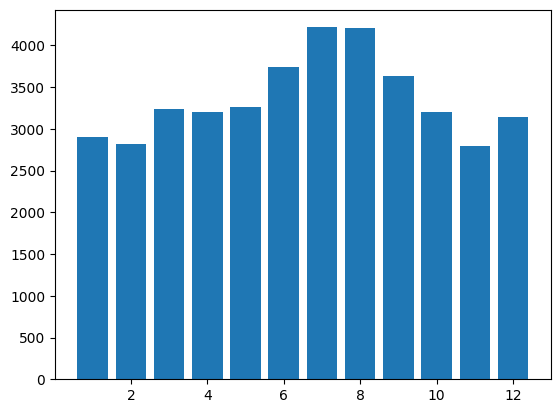

In [26]:
data_month=data.groupby('month')[['passengers']].sum().reset_index()
plt.bar(data_month['month'],data_month['passengers'])

month
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
Name: passengers, dtype: object

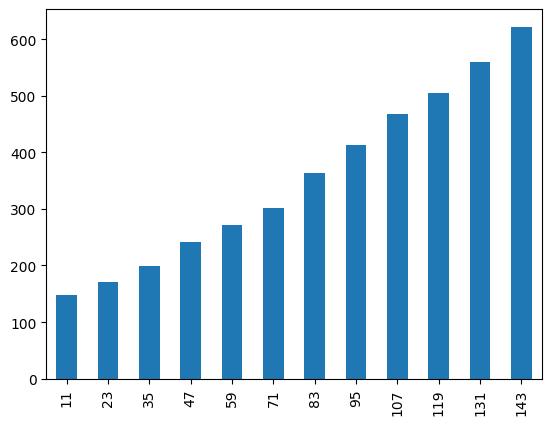

In [28]:
data.groupby('month')['passengers'].plot.bar()

Text(0.5, 1.0, 'The number of passengers in each month')

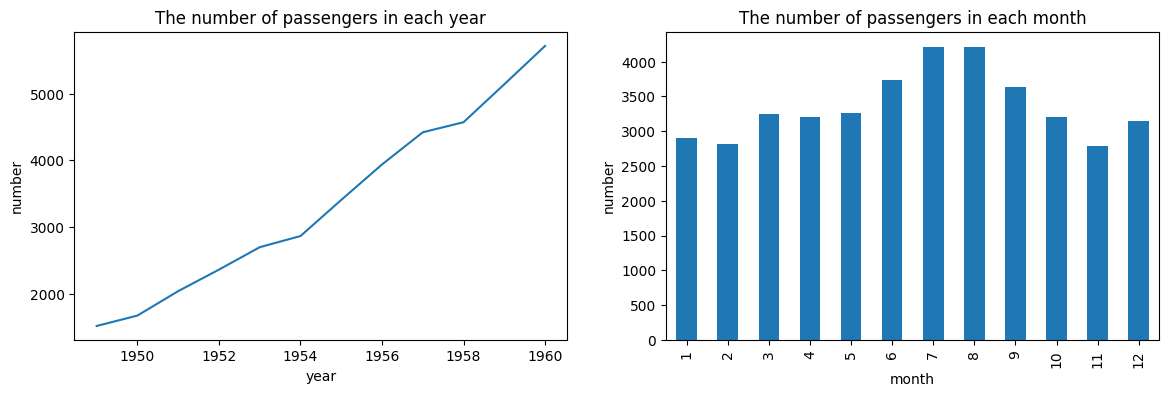

In [32]:
# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(data.groupby('year')['passengers'].sum())
axs[0].set_xlabel('year')
axs[0].set_ylabel('number')
axs[0].set_title('The number of passengers in each year')
data.groupby('month')['passengers'].sum().plot.bar(ax=axs[1])
axs[1].set_xlabel('month')
axs[1].set_ylabel('number')
axs[1].set_title('The number of passengers in each month')

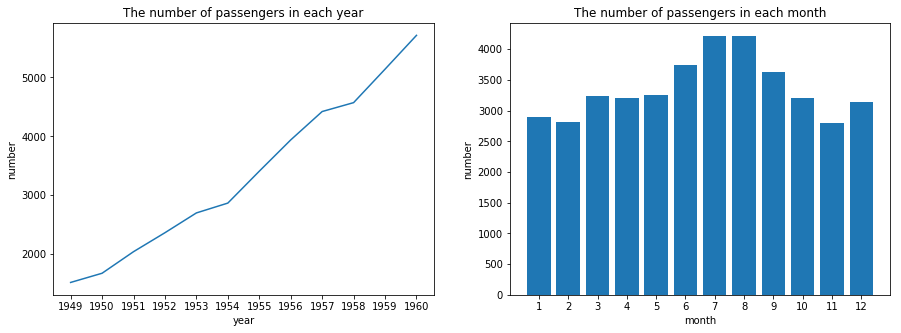

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [33]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
# 包装一个散点图的函数便于复用
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。

    # 不显示顶部和右侧的坐标线
    #ax.spines['top'].set_color('none')
    #ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

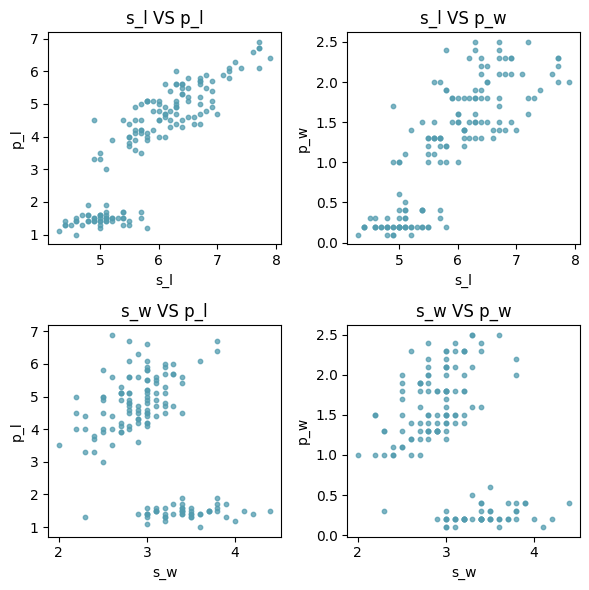

In [44]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Scatterplot 1
scatterplot(data['sepal_length'], data['petal_length'], 's_l', 'p_l', 's_l VS p_l', ax=axs[0, 0])

# Scatterplot 2
scatterplot(data['sepal_length'], data['petal_width'], 's_l', 'p_w', 's_l VS p_w', ax=axs[0, 1])

# Scatterplot 3
scatterplot(data['sepal_width'], data['petal_length'], 's_w', 'p_l', 's_w VS p_l', ax=axs[1, 0])

# Scatterplot 4
scatterplot(data['sepal_width'], data['petal_width'], 's_w', 'p_w', 's_w VS p_w', ax=axs[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

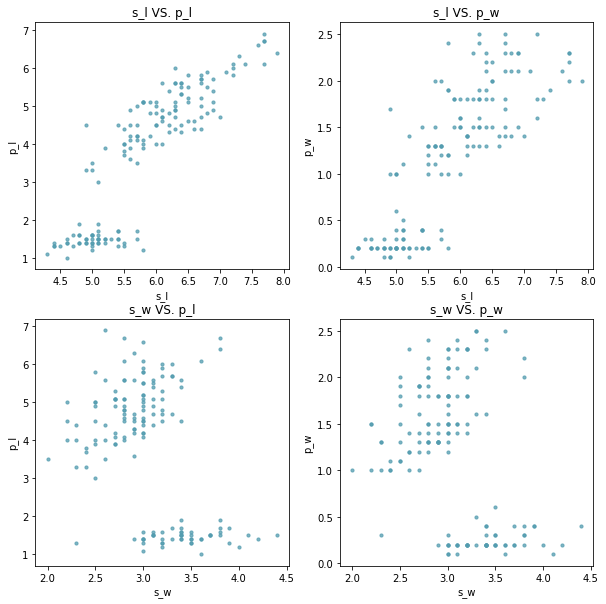

In [51]:
color_mapping = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

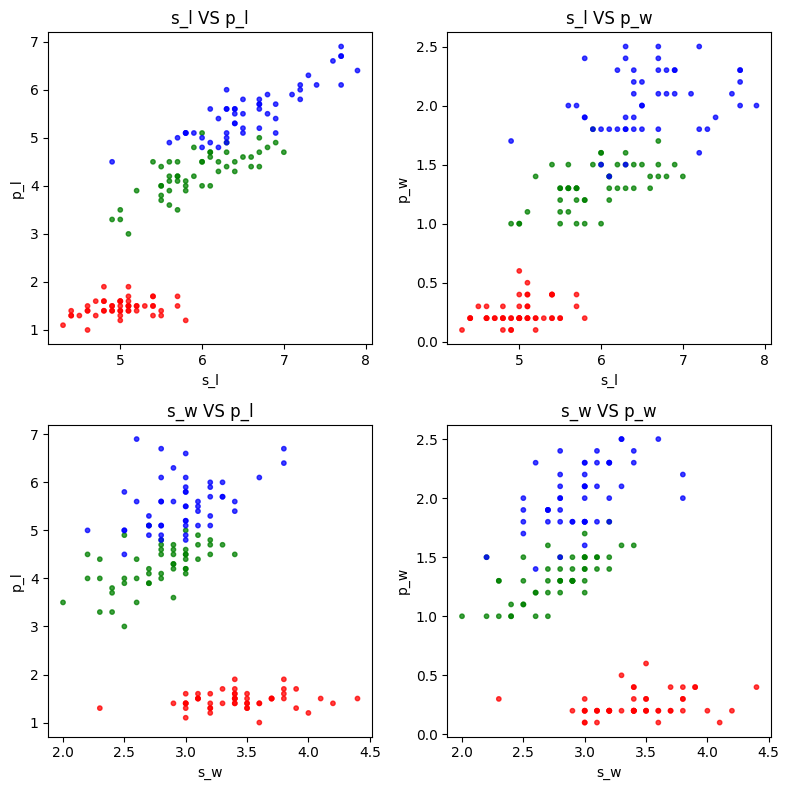

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0,0].scatter(data['sepal_length'], data['petal_length'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[0,0].set_title('s_l VS p_l')
axs[0,0].set_xlabel('s_l')
axs[0,0].set_ylabel('p_l')

axs[0,1].scatter(data['sepal_length'], data['petal_width'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[0,1].set_title('s_l VS p_w')
axs[0,1].set_xlabel('s_l')
axs[0,1].set_ylabel('p_w')

axs[1,0].scatter(data['sepal_width'], data['petal_length'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[1,0].set_title('s_w VS p_l')
axs[1,0].set_xlabel('s_w')
axs[1,0].set_ylabel('p_l')

axs[1,1].scatter(data['sepal_width'], data['petal_width'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[1,1].set_title('s_w VS p_w')
axs[1,1].set_xlabel('s_w')
axs[1,1].set_ylabel('p_w')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

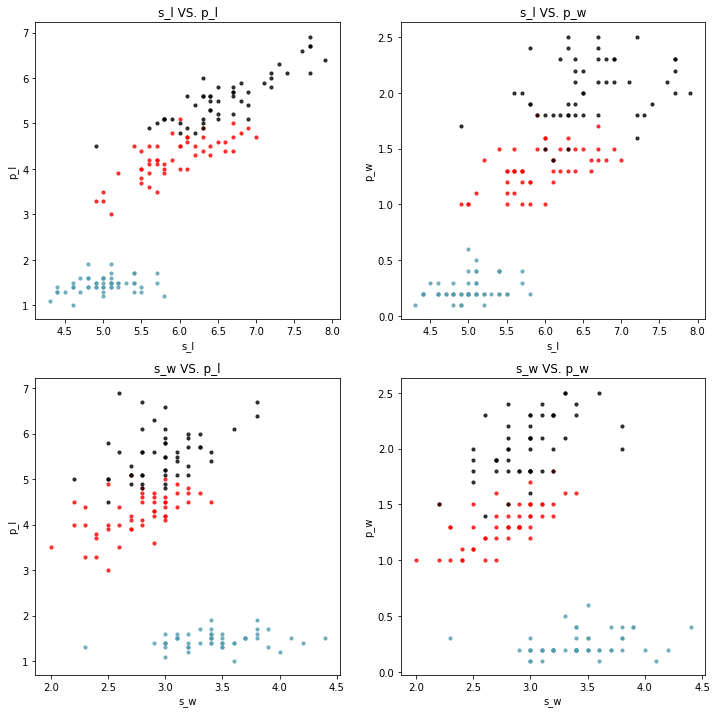

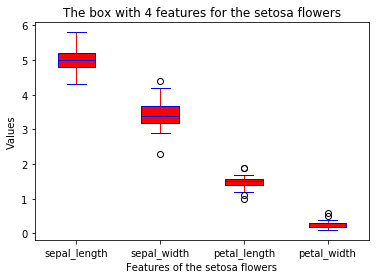

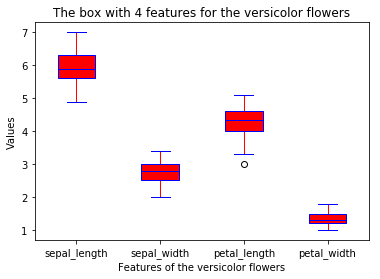

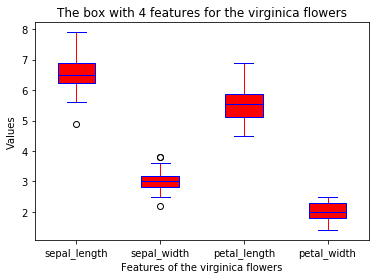

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [5]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


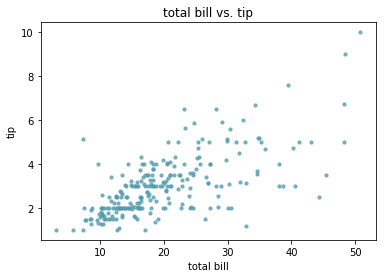

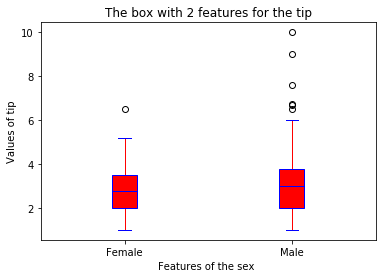

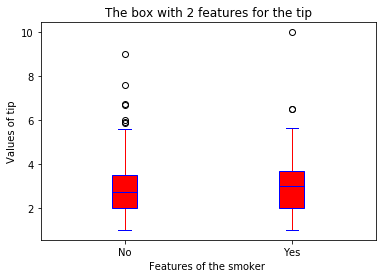

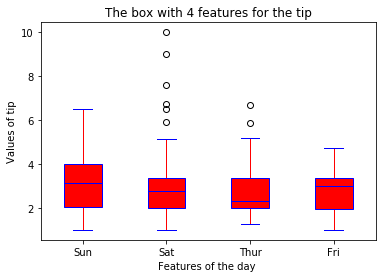

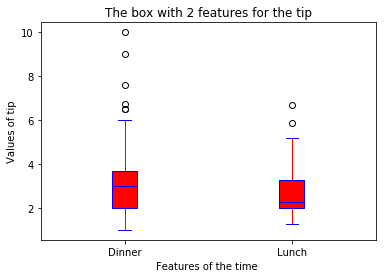

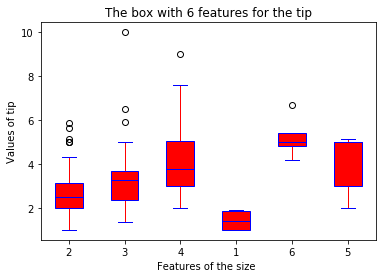

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


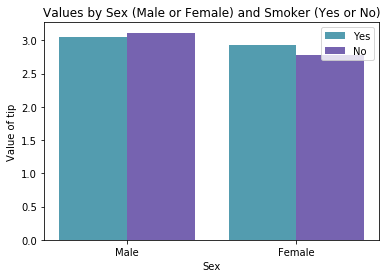

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [6]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


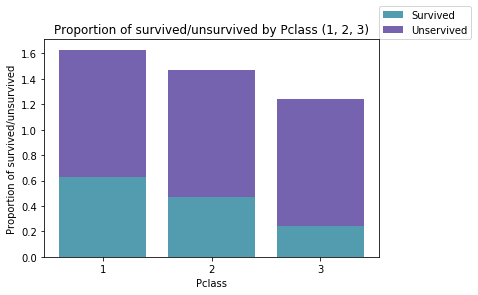

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


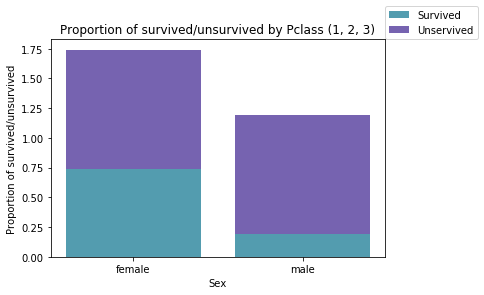

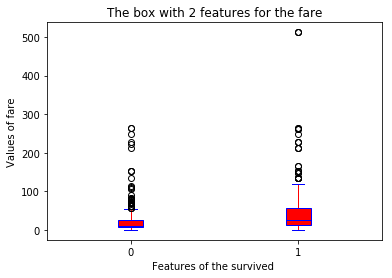

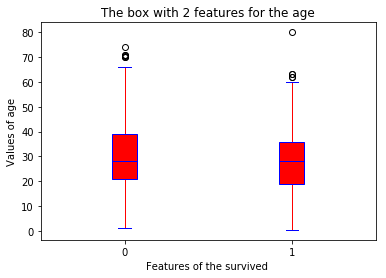

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


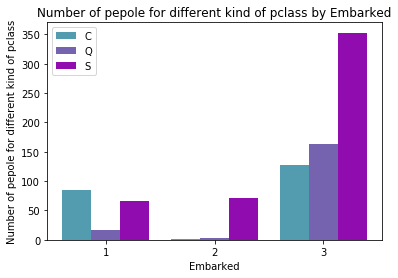

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

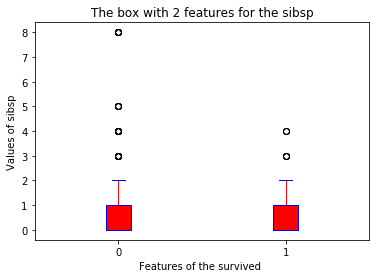

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

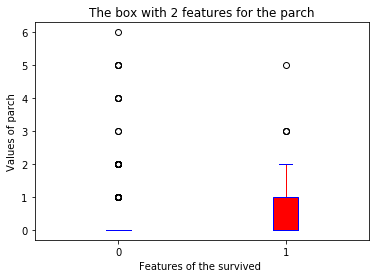

survived    0    1
alone             
False     175  179
True      374  163


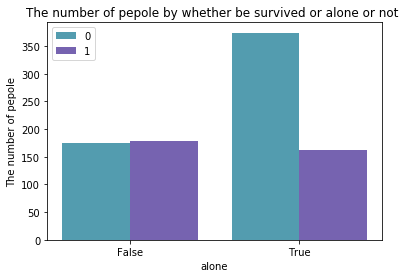